<a href="https://colab.research.google.com/github/fyhao/colab/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Refer to https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


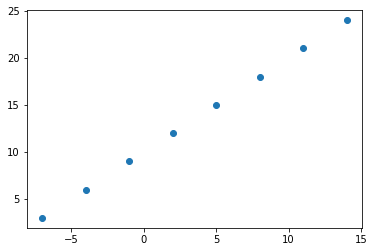

In [41]:
# creating data using numpy and matplotlib pyplot to show
import numpy as np
import matplotlib.pyplot as plt
# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X, y)

In [4]:
X, y, y == X + 10

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]),
 array([ True,  True,  True,  True,  True,  True,  True,  True]))

In [5]:
X = tf.constant(np.array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]))
y = tf.constant(np.array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
# Create a model
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 401ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [8]:
# improve model by increasing epoch

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 9m

In [9]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [42]:
# Evaluating a model

X = np.arange(-100,100,4)
y = np.arange(-90,110,4)
X, y, y == X + 10

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  Tru

In [11]:
len(X)

50

In [44]:
# Prepare to split data into training set and test set

X_train = X[:40]  # first 40 
y_train = y[:40]  # first 40

X_test = X[40:] # last 10
y_test = y[40:] # last 10

len(X_train), len(X_test), len(y_train), len(y_test), X_train.shape, X_test.shape, y_train.shape, y_test.shape

(40, 10, 40, 10, (40,), (10,), (40,), (10,))

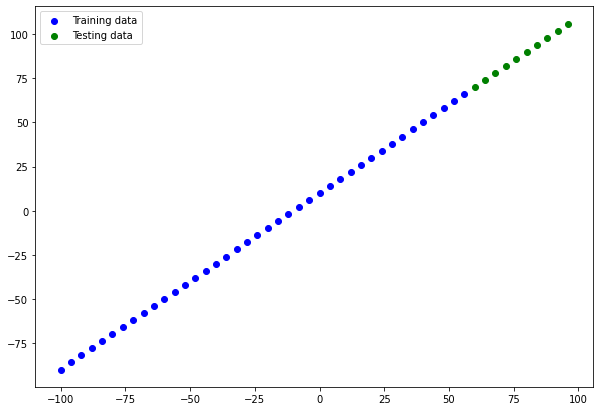

In [45]:
# Visualize
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show the legend
plt.legend();

In [14]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


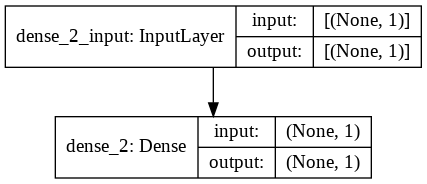

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [19]:
# Visualizing the predictions
y_preds = model.predict(X_test)
y_preds, X_test.dtype, y_preds.dtype

(array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32), dtype('int64'), dtype('float32'))

In [20]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_preds):
  # plot training data, test data, and compares prediction
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c='r',label="Prediction data")
  # show the legend
  plt.legend();


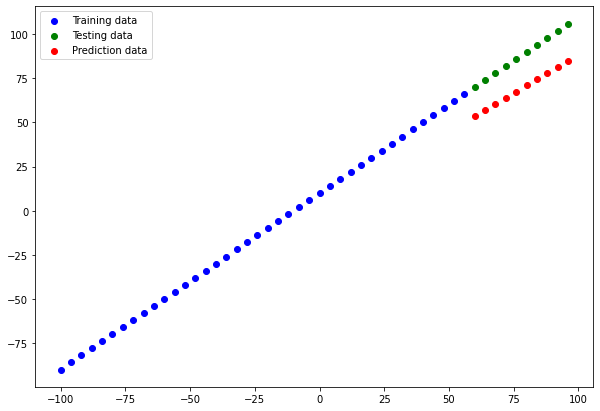

In [21]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [22]:
# Evaluating predictions

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [23]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae, y_test, y_preds, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
        14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>,
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [24]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [25]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [26]:
# returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=18.745327377319335>

In [27]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
  

In [28]:
# Running experiments to improve a model

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - los

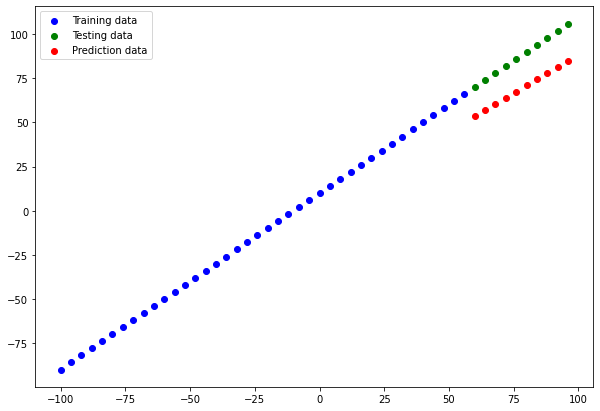

In [29]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [30]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [31]:
# build model_2

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_2.fit(X_train, y_train, epochs=100,verbose=0)

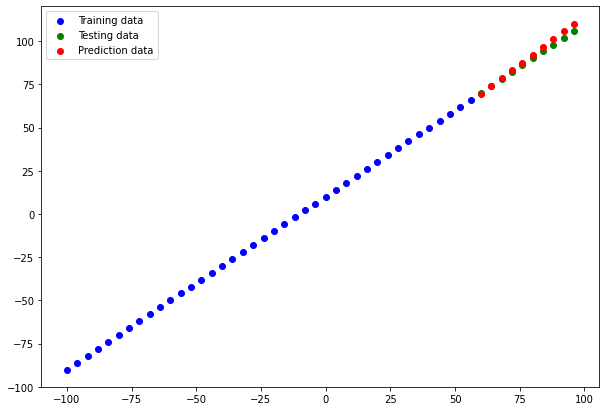

In [32]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [33]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

In [34]:
# build model_3
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(X_train, y_train, epochs=500, verbose=0)

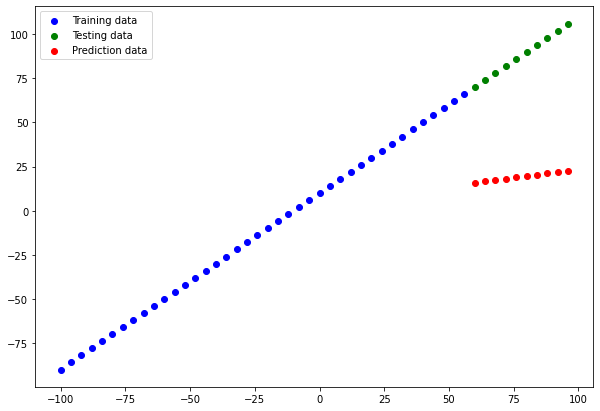

In [35]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [36]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

In [37]:
# Comparing the results
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
import pandas as pd
all_results=pd.DataFrame(model_results,columns=['model','mae','mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


In [38]:
# Saving a model

model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [39]:
!ls best_model_SavedModel_format

assets	saved_model.pb	variables


In [40]:
model_2.save('best_model_HDFS_format.h5')

In [41]:
!ls best_model_HDFS_format.h5

best_model_HDFS_format.h5


In [42]:
# Loading a model

loaded_saved_model = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [43]:
# test it out
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [29]:
# insurance dataset

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
# Turns all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [32]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [34]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [35]:
# create model

tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10559.6234 - mae: 10559.6234
Epoch 2/100
34/34 [==============================] - 0s 950us/step - loss: 7718.9411 - mae: 7718.9411
Epoch 3/100
34/34 [==============================] - 0s 984us/step - loss: 7011.5586 - mae: 7011.5586
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8097.3164 - mae: 8097.3164
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7612.9856 - mae: 7612.9856
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7660.9957 - mae: 7660.9957
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.3691 - mae: 7613.3691
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.3196 - mae: 7780.3196
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7749.3444 - mae: 7749.3444
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8138.7174 - mae: 813

9/9 [==============================] - 0s 2ms/step - loss: 8628.2363 - mae: 8628.2363


ValueError: ignored

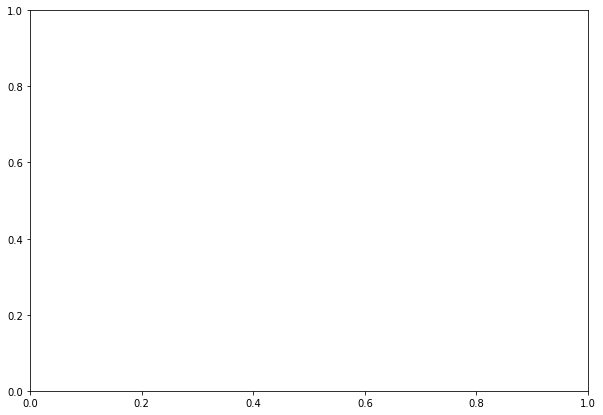

In [39]:
insurance_model.evaluate(X_test, y_test)

In [50]:
# Create another to improve

tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [51]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Text(0.5, 0, 'epochs')

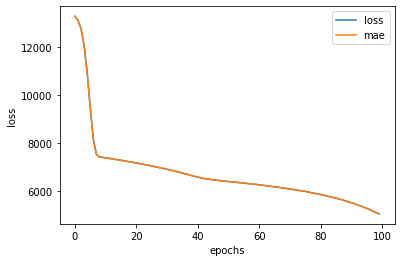

In [52]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [53]:
# training more epochs
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [54]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

Text(0.5, 0, 'epochs')

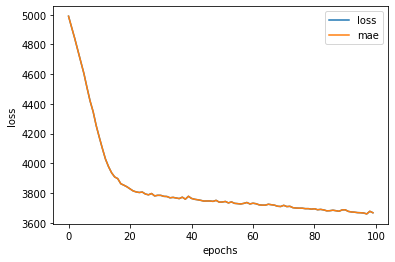

In [55]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [56]:
# normalization & standardization

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [57]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [59]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [60]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.7632 - mae: 3171.7632


In [61]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3494.728515625, 3171.76318359375)

In [96]:
# My own exercises and personal data

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
weather = pd.read_csv("https://raw.githubusercontent.com/fyhao/colab/main/weather.csv?nocache=1")

In [4]:
weather.head()

,datetime,city,temp,text
0,2021-05-15,252257,12,Cloudy
1,2021-05-15,Adelaide,16,Mostly Cloudy
2,2021-05-15,Adrar,27,Breezy
3,2021-05-15,Airok Airport,27,Showers
4,2021-05-15,Al Fallojah,31,Sunny


In [97]:
# Turns all categories into numbers
weather_one_hot = pd.get_dummies(weather)
weather_one_hot.head()

,temp,datetime_2021-05-11,datetime_2021-05-12,datetime_2021-05-13,datetime_2021-05-14,datetime_2021-05-15,city_252257,city_Adelaide,city_Adrar,city_Airok Airport,city_Al Fallojah,city_Al Hassat,city_Al Hujaymah,city_Al Qasr,city_Al Qatranah,city_Al Ubayyid,city_Al Wabra,city_Anderson,city_Ando,city_Andorra la Vella,city_Ans By,city_Ar Rifa,city_Arvaikher,city_At Tuwaytah,city_Atebubu,city_Ayios Sozomenos,city_Baie-Mahault,city_Baldrine,city_Bathsheba,city_Bawiti,city_Bedford,city_Bei'an,city_Beira,city_Bemposta,city_Bodden Town,city_Bois du Parc,city_Bokila,city_Bonavista,city_Bor,city_Borgo Maggiore,...,city_Tsibirika,city_Tura,city_Umanak,city_Valencia,city_Valeni,city_Vatican City,city_Victoria,city_Villa de Cos,city_Voljevac,city_Vunidawa,city_Windy Hill,city_Xincheng,city_Xinyi Township,city_Yaounde,city_Yazd,city_Yellowhead County,city_Yerbas Buenas,city_Yinggen,city_Yiwu,city_Youxi,city_Yuli,city_Yuzhong,city_Zagorje Ob Savi,city_Zardob,city_Zhezqazghan,city_Zone de la Patte d'Oie,text_Breezy,text_Clear,text_Cloudy,text_Mostly Clear,text_Mostly Cloudy,text_Mostly Sunny,text_Partly Cloudy,text_Rain,text_Scattered Showers,text_Scattered Thunderstorms,text_Showers,text_Sunny,text_Thunderstorms,text_Windy
0,12,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,27,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,31,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [98]:
X = weather_one_hot.drop('text_Thunderstorms', axis=1)
y = weather_one_hot['text_Thunderstorms']

X.head(), y.head()

(   temp  datetime_2021-05-11  ...  text_Sunny  text_Windy
 0    12                    0  ...           0           0
 1    16                    0  ...           0           0
 2    27                    0  ...           0           0
 3    27                    0  ...           0           0
 4    31                    0  ...           1           0
 
 [5 rows x 233 columns], 0    0
 1    0
 2    0
 3    0
 4    0
 Name: text_Thunderstorms, dtype: uint8)

In [99]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, X_train.head(), X_test.head(), y_train.head(), y_test.head()

((800, 233),
 (200, 233),
      temp  datetime_2021-05-11  ...  text_Sunny  text_Windy
 29     24                    0  ...           0           0
 535    13                    0  ...           0           0
 695    15                    0  ...           0           0
 557    17                    0  ...           0           0
 836    27                    0  ...           0           0
 
 [5 rows x 233 columns],
      temp  datetime_2021-05-11  ...  text_Sunny  text_Windy
 521    18                    0  ...           0           0
 737    24                    0  ...           0           0
 740    13                    0  ...           1           0
 660    37                    0  ...           0           0
 411    24                    0  ...           0           0
 
 [5 rows x 233 columns],
 29     0
 535    0
 695    0
 557    0
 836    1
 Name: text_Thunderstorms, dtype: uint8,
 521    0
 737    1
 740    0
 660    0
 411    0
 Name: text_Thunderstorms, dtype: uint8)

In [100]:
# create model

tf.random.set_seed(42)
weather_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
weather_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
history = weather_model.fit(X_train, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'epochs')

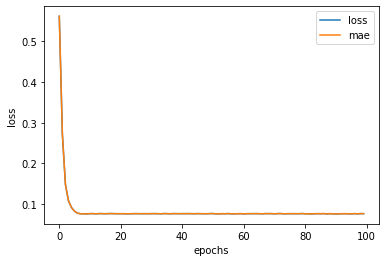

In [101]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [102]:
weather_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0732 - mae: 0.0732


[0.07323352992534637, 0.07323352992534637]

In [103]:
tf.random.set_seed(42)

weather_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

weather_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = weather_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [104]:
weather_model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0264 - mae: 0.0264


[0.026413314044475555, 0.026413314044475555]

Text(0.5, 0, 'epochs')

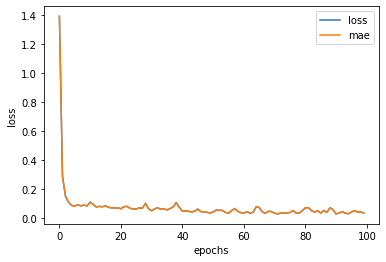

In [105]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


In [106]:
X_test.shape, y_preds.shape

((200, 233), (200, 1))

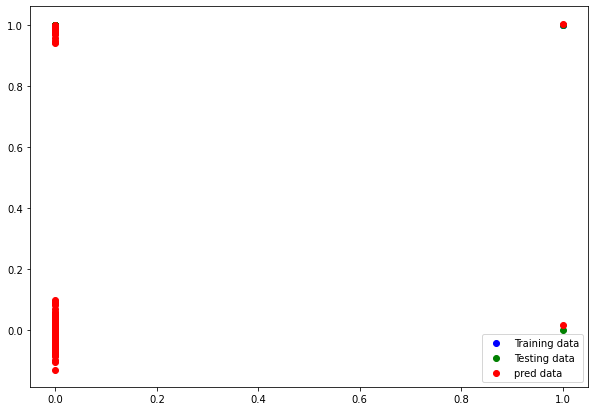

In [112]:
# Make and plot predictions for model_1
y_preds = weather_model_2.predict(X_test)
X_test.shape, y_preds.shape, y_preds.ndim, X_test.ndim, y_test.ndim, y_test.shape

# Visualize
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train['city_Singapore'], y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test['city_Singapore'], y_test, c='g', label='Testing data')
plt.scatter(X_test['city_Singapore'], y_preds, c='r', label='pred data')
# show the legend
plt.legend();